# Importing and Cleaning Data

In [265]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Importing dataset as dataframe (df)
data = pd.read_csv("owid-covid-data.csv")
data = data[data.location == "Canada"] # Filtering for location (country) of Canada only

# Selecting features
data = data[['date',
            'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests_smoothed',
            'new_vaccinations_smoothed', 'new_people_vaccinated_smoothed',
            'reproduction_rate', 'icu_patients', 'hosp_patients',
            'positive_rate', 'tests_per_case', 'total_boosters',
            'people_fully_vaccinated', 'stringency_index'
            ]]

# Set date as index
data.set_index("date",inplace=True)
data.sort_index(inplace=True)

# Data cleaning
data = data.interpolate()
data = data.fillna(value=0)

# Scaling
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)
data_scaled


,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,reproduction_rate,icu_patients,hosp_patients,positive_rate,tests_per_case,total_boosters,people_fully_vaccinated,stringency_index
date,,,,,,,,,,,,,
2020-01-23,-0.742070,-1.122627,-1.638000,-0.735334,-0.469680,-2.932943,-1.335946,-1.303527,-1.143461,-0.891509,-0.683630,-1.009374,-1.969509
2020-01-24,-0.742070,-1.122627,-1.638000,-0.735334,-0.469680,-2.932943,-1.335946,-1.303527,-1.143461,-0.891509,-0.683630,-1.009374,-1.969509
2020-01-25,-0.742070,-1.122627,-1.638000,-0.735334,-0.469680,-2.932943,-1.335946,-1.303527,-1.143461,-0.891509,-0.683630,-1.009374,-1.969509
2020-01-26,-0.742070,-1.122627,-1.638000,-0.735334,-0.469680,-2.932943,-1.335946,-1.303527,-1.143461,-0.891509,-0.683630,-1.009374,-1.969509
2020-01-27,-0.742070,-1.122627,-1.638000,-0.735334,-0.469680,-2.932943,-1.335946,-1.303527,-1.143461,-0.891509,-0.683630,-1.009374,-1.969509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,-0.389459,-0.201773,-0.948538,-0.127476,-0.235432,-0.827358,-0.495010,1.067303,0.392305,-0.592164,2.156540,1.158303,-1.860187
2022-11-24,-0.496850,-0.468336,-0.948538,-0.092144,-0.233720,-0.944335,-0.495010,1.067303,0.392305,-0.592164,2.168585,1.158630,-1.860187
2022-11-25,-0.489457,-0.499500,-0.948538,-0.185642,-0.239326,-0.944335,-0.495010,1.067303,0.392305,-0.592164,2.169833,1.158649,-1.860187


# Train Test Split (Time Series)

In [266]:
from sklearn.model_selection import TimeSeriesSplit

# Define X (independent) and y (dependent) features
X = data_scaled.drop(['new_deaths_smoothed'], axis=1)
y = data_scaled['new_deaths_smoothed']

tss = TimeSeriesSplit(test_size=60) # predict for 60 days (2 months)

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(
    "Test size = ",
    str( len(X_test)/( len(X_test) + len(X_train) )
       )
    )
    

Test size =  0.075
Test size =  0.06976744186046512
Test size =  0.06521739130434782
Test size =  0.061224489795918366
Test size =  0.057692307692307696


# Multiple Linear Regression

Coefficients:
 [-0.27715426 -0.22960999  0.13682631 -0.63807693 -0.05160568  0.50661074
  0.75684067 -0.03498375 -0.28264462 -0.00920129 -0.46326855  0.43761134] 

Intercept:
 -0.0003415418671624329 



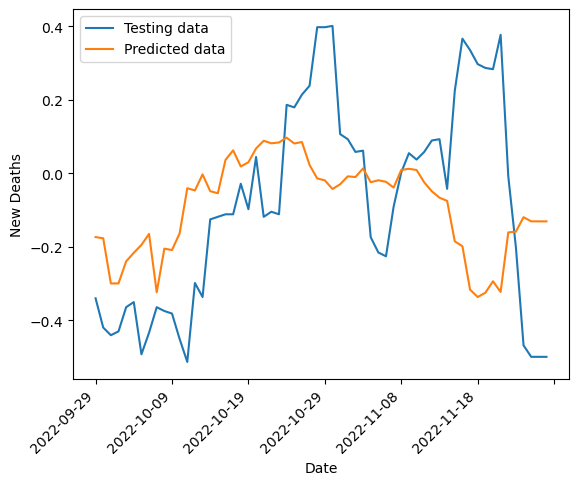

Mean absolute error:
 0.22545238780375357 



In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker


#Define model
regression_model = None
regression_model = LinearRegression().fit(X_train, y_train)
print("Coefficients:\n", regression_model.coef_, "\n") #Print coeff
print("Intercept:\n", regression_model.intercept_, "\n") #Print intercept

#Predictions
y_predicted_regression = regression_model.predict(X_test) #Make predictions
y_predicted_regression = pd.DataFrame(y_predicted_regression, index=y_test.index)

#Plotting
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(y_test.index, y_test, label = 'Testing data') #plot testing data
plt.plot(y_predicted_regression.index, y_predicted_regression, label = 'Predicted data') #plot predicted data
plt.xlabel('Date') #x axis label (date)
plt.ylabel('New Deaths') #y axislabel (new deaths0
plt.legend() #add legend

# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=10) # set tick interval
)

plt.show()


#Evaluation
MAE_regression = mean_absolute_error(y_test, y_predicted_regression) #Calculate MAE
print("Mean absolute error:\n", MAE_regression, "\n")


# K-Nearest Neighbors Regressor

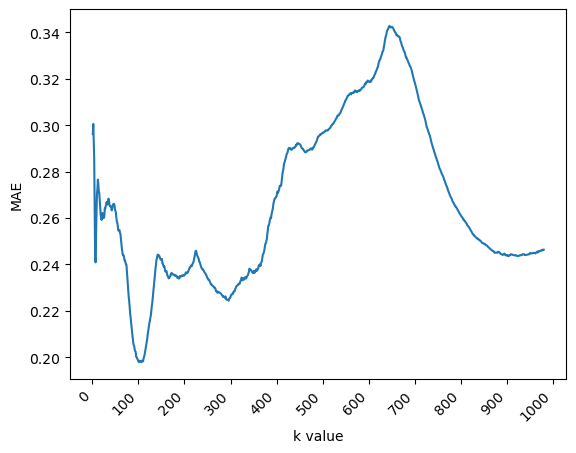

The optimal k is: 101 



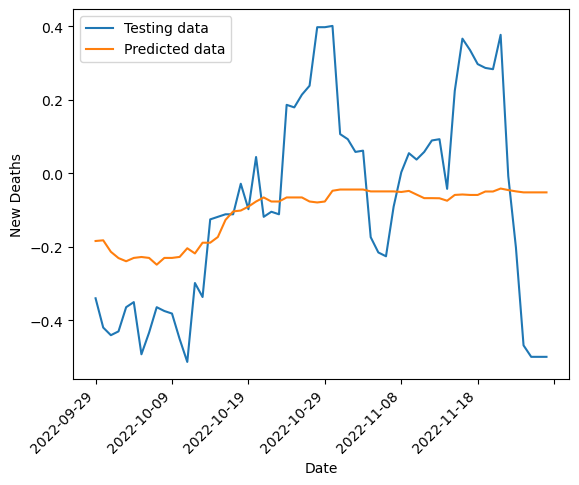

Mean absolute error:
 0.1979432589063181 



In [270]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker


#############################
### DETERMINING OPTIMAL K ###
#############################

k_values = pd.DataFrame(columns = ['MAE'])

for i in range(1,len(X_train)+1): # Iterate model through each possible K value
    
    #Define model
    KNN_model = None
    KNN_model = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)

    #Predictions
    y_predicted_KNN = None
    y_predicted_KNN = KNN_model.predict(X_test)
    y_predicted_KNN = pd.DataFrame(y_predicted_KNN, index=y_test.index)

    #Evaluation
    MAE_KNN = None
    MAE_KNN = mean_absolute_error(y_test, y_predicted_KNN) #Calculate MAE
    
    #Append to K value dataframe
    k_values.loc[i] = MAE_KNN

    
#Plotting k values
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(k_values.index, k_values['MAE']) #plot MAE
plt.xlabel('k value') #x axis label (date)
plt.ylabel('MAE') #y axislabel (new deaths0
# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=100) # set tick interval
)
plt.show()
 
# Print optimal k
optimal_k = int(k_values.idxmin(axis=0).values) #save optimal k as index of min. MAE
print("The optimal k is:", optimal_k, "\n")


#######################################
### MODEL EVALUATION WITH OPTIMAL K ###
#######################################

#Define model
KNN_model = None
KNN_model = KNeighborsRegressor(n_neighbors = optimal_k).fit(X_train, y_train)

#Predictions
y_predicted_KNN = None
y_predicted_KNN = KNN_model.predict(X_test)
y_predicted_KNN = pd.DataFrame(y_predicted_KNN, index=y_test.index)

#Plotting
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(y_test.index, y_test, label = 'Testing data') #plot testing data
plt.plot(y_predicted_KNN.index, y_predicted_KNN, label = 'Predicted data') #plot predicted data
plt.xlabel('Date') #x axis label (date)
plt.ylabel('New Deaths') #y axislabel (new deaths0
plt.legend() #add legend

# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=10) # set tick interval
)

plt.show()

#Evaluation
MAE_KNN = None
MAE_KNN = mean_absolute_error(y_test, y_predicted_KNN) #Calculate MAE
print("Mean absolute error:\n", MAE_KNN, "\n")


# Decision Tree Regressor

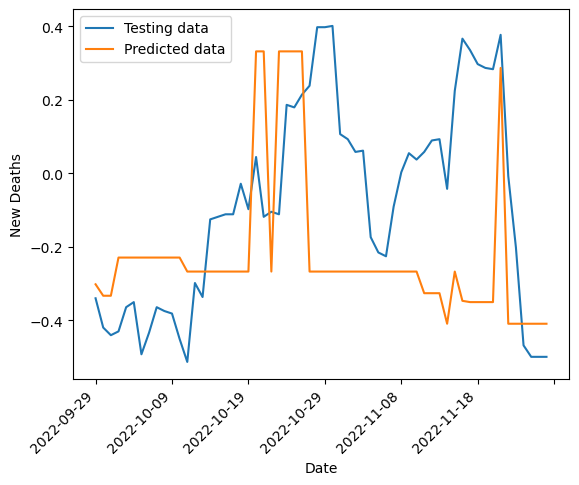

Mean absolute error:
 0.27498364312621787 



In [285]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker


#Define model
tree_model = None
tree_model = DecisionTreeRegressor().fit(X_train, y_train)

#Predictions
y_predicted_tree = tree_model.predict(X_test)
y_predicted_tree = pd.DataFrame(y_predicted_tree, index=y_test.index)

#Plotting
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(y_test.index, y_test, label = 'Testing data') #plot testing data
plt.plot(y_predicted_tree.index, y_predicted_tree, label = 'Predicted data') #plot predicted data
plt.xlabel('Date') #x axis label (date)
plt.ylabel('New Deaths') #y axislabel (new deaths0
plt.legend() #add legend

# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=10) # set tick interval
)

plt.show()

#Evaluation
MAE_tree = mean_absolute_error(y_test, y_predicted_tree) #Calculate MAE
print("Mean absolute error:\n", MAE_tree, "\n")


# Sequential Neural Network

In [286]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
# set seed
tf.random.set_seed(123)

#Define model
NeuralNetwork_model = None
NeuralNetwork_model = Sequential()

# add input layer
NeuralNetwork_model.add(
    InputLayer(input_shape=(12,)) # 12 features for input
)

# add 12 hidden layers, 12 neurons each
NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

NeuralNetwork_model.add(
    Dense(12, activation = 'relu')
)

# add output layer, 1 variable
NeuralNetwork_model.add(
    Dense(1)
)

# compile using MAE
NeuralNetwork_model.compile(
    loss='mean_squared_error'
)

# Train
NeuralNetwork_model.fit(X_train, y_train, epochs=100)


Epoch 1/100


2022-12-19 21:34:14.543510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 33ms/step - loss: 1.0030
Epoch 2/100
31/31 [==============================] - 1s 18ms/step - loss: 0.6956
Epoch 3/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3522
Epoch 4/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1362
Epoch 5/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0662
Epoch 6/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0476
Epoch 7/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0414
Epoch 8/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0371
Epoch 9/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0349
Epoch 10/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0325
Epoch 11/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0293
Epoch 12/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0307
Epoch 13/100
31/31 [=================

2/2 [==============================] - 0s 45ms/step


2022-12-19 21:35:15.319434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


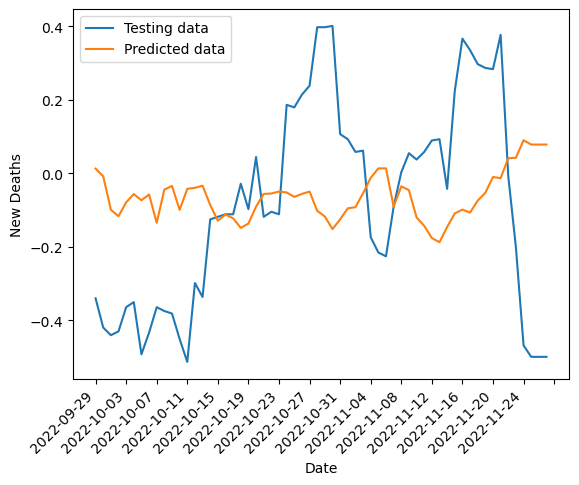

Mean absolute error:
 0.26496948705765705 



In [287]:
# Predictions
y_predicted_NeuralNetwork = NeuralNetwork_model.predict(X_test)
y_predicted_NeuralNetwork = pd.DataFrame(y_predicted_NeuralNetwork, index=y_test.index)

#Plotting
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(y_test.index, y_test, label = 'Testing data') #plot testing data
plt.plot(y_predicted_NeuralNetwork.index, y_predicted_NeuralNetwork, label = 'Predicted data') #plot predicted data
plt.xlabel('Date') #x axis label (date)
plt.ylabel('New Deaths') #y axislabel (new deaths0
plt.legend() #add legend
# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=4) # set tick interval
)
plt.show()

# Evaluation
MAE_NeuralNetwork = mean_absolute_error(y_test, y_predicted_NeuralNetwork)
print("Mean absolute error:\n", MAE_NeuralNetwork, "\n")


# Plot

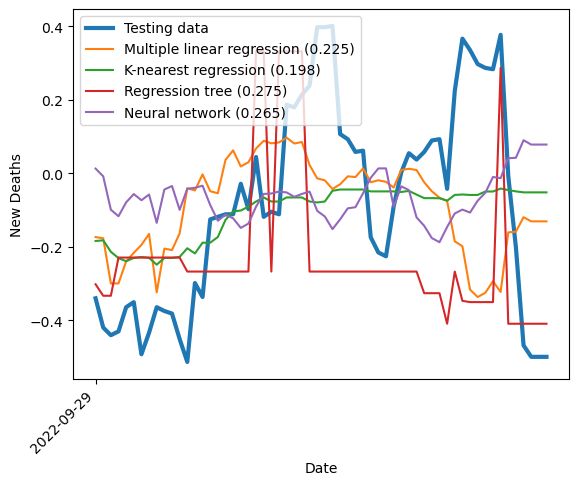

In [295]:
fig, ax = plt.subplots()
#plt.plot(y_train.index, y_train, label = 'Training data') #plot training data
plt.plot(y_test.index, y_test, label = 'Testing data', linewidth=3) #plot testing data
plt.plot(y_predicted_NeuralNetwork.index, y_predicted_regression, label = 'Multiple linear regression (0.225)') #plot regression predictions
plt.plot(y_predicted_NeuralNetwork.index, y_predicted_KNN, label = 'K-nearest regression (0.198)') #plot regression predictions
plt.plot(y_predicted_NeuralNetwork.index, y_predicted_tree, label = 'Regression tree (0.275)') #plot regression predictions
plt.plot(y_predicted_NeuralNetwork.index, y_predicted_NeuralNetwork, label = 'Neural network (0.265)') #plot regression predictions

plt.xlabel('Date') #x axis label (date)
plt.ylabel('New Deaths') #y axislabel (new deaths0
plt.legend() #add legend
# x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right") # rotate 45 degrees
ax.xaxis.set_major_locator(
    plticker.MultipleLocator(base=100) # set tick interval
)
plt.show()

# Etc.

In [55]:
print(
    data["location"].nunique()
)

248


In [60]:
print(
    data["date"].nunique()
)

1063


In [63]:
print(
    data.min()
)

iso_code                                           ABW
location                                   Afghanistan
date                                        2020-01-01
total_cases                                        1.0
new_cases                                          0.0
                                              ...     
population                                        47.0
excess_mortality_cumulative_absolute          -37726.1
excess_mortality_cumulative                     -28.45
excess_mortality                                -95.92
excess_mortality_cumulative_per_million   -1984.281517
Length: 65, dtype: object


/var/folders/wz/gr7z7mvd2vlg27d3y8x5dzwh0000gn/T/ipykernel_33212/164205164.py:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.min()


In [59]:
print(
    data.columns
)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't